In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')

In [4]:
from sklearn.datasets import make_blobs

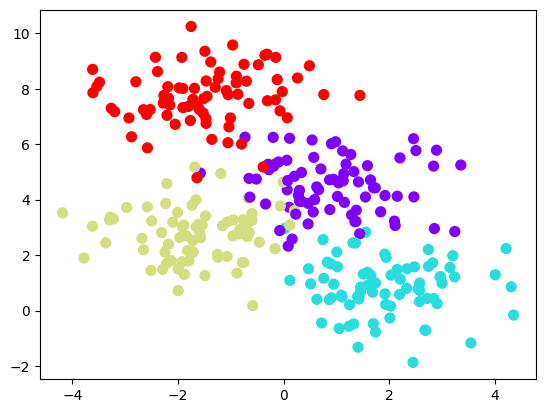

In [5]:
X,y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plt.savefig('random_data.png')

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [7]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Creat a color plot with the result
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, zorder=1)
    ax.set(xlim=xlim, ylim=ylim)
    plt.savefig('visualizedtree.png')

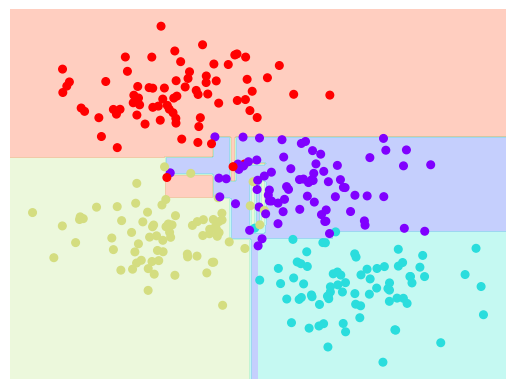

In [8]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

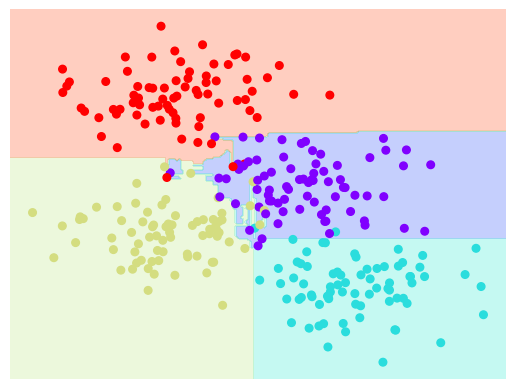

In [10]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

In [11]:
rng = np.random.RandomState(42)
x = 10*rng.rand(200)

In [12]:
def model(x,sigma=0.3):
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma*rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

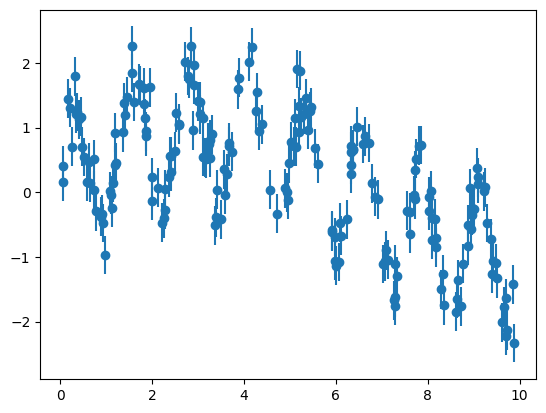

In [13]:
y=model(x)
plt.errorbar(x,y,0.3,fmt='o');

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)


RandomForestRegressor(n_estimators=200)

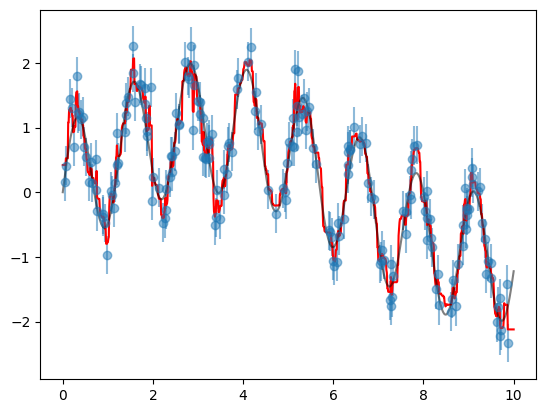

In [16]:
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit,sigma=0)
plt.errorbar(x,y,0.3,fmt='o',alpha=0.5)
plt.plot(xfit,yfit,'-r');
plt.plot(xfit,ytrue,'-k',alpha=0.5);


In [17]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

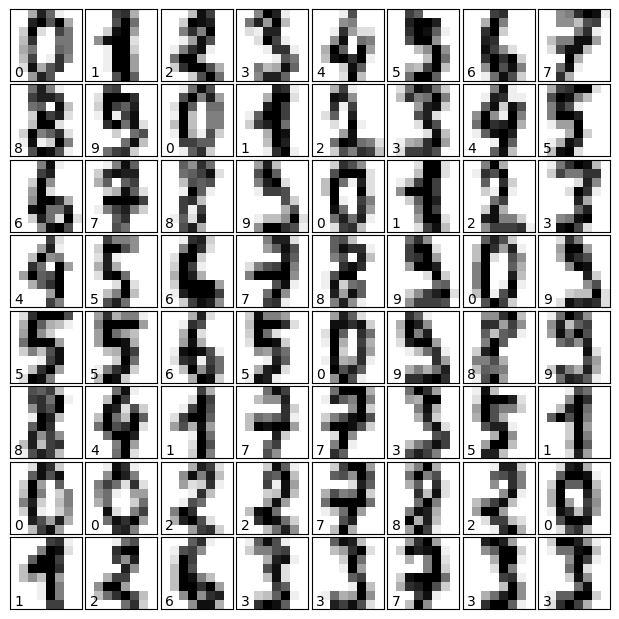

In [20]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(digits.target[i]))

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain,Xtest,ytrain,ytest = train_test_split(digits.data, digits.target,random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain,ytrain)
ypred=model.predict(Xtest)

In [22]:
from sklearn import metrics
print(metrics.classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



<Axes: >

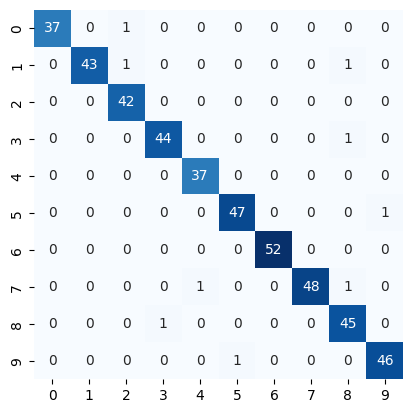

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest,ypred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,cmap='Blues')
